In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import fr_core_news_md
nlp = fr_core_news_md.load()

In [2]:
# Chargement des données
df = pd.read_csv ("Surligneur.tsv", sep="\t")

In [3]:
df.head()

,surligneurs,catégorie
0,Alors que la ministre de l'Enseignement supéri...,education
1,L’enseignement des langues à l’école relève du...,education
2,"Les présidents d’universités, en tant qu’ensei...",education
3,Ce décret est issu d’un accord du 31 mars 2017...,education
4,L’état du droit ne permet pas actuellement d’i...,education


# Fontion de nétoyage du texte

In [4]:
def clean_text(text):
    # conversion de texte en minuscules
    text = text.strip().lower()
    
    # Suppression des pentuation, des espaces et les stop words 
    noStopWordsnoPunct = [token for token in nlp(text) if not token.is_punct | token.is_space 
                                                                          | token.is_stop]
    
    doc = nlp(' '.join([tokens.text for tokens in noStopWordsnoPunct]))
    return doc

# Fonction de vectorisation 

In [5]:
def get_vecteur(text):
    # Nétoyage du text.
    doc = clean_text(text)
    
    vec = doc.vector
    return vec

# Appliquer la vectorisation sur notre data set.

In [6]:
df['surligneurs'] = df['surligneurs'].apply(lambda x: get_vecteur(x))

In [7]:
df.head()

,surligneurs,catégorie
0,"[0.4827314, -0.42155668, -0.50304383, 1.764819...",education
1,"[-0.136676, 0.15048926, 0.1939364, 1.3356192, ...",education
2,"[0.06934749, 0.29645643, 0.3573029, 1.2708311,...",education
3,"[-0.2537696, 0.7285733, -0.22208671, 2.023071,...",education
4,"[0.55898196, -0.38768247, 0.12921524, 1.318892...",education


# Entraînement du Model Machine learning.

In [74]:
X = df['surligneurs'].to_numpy()
X = X.reshape(-1, 1)
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
y = df['catégorie']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [75]:
X_train.shape, X_test.shape

((9, 300), (5, 300))

# affichage de confusion_matrix

In [76]:
def plot_confusion_matrix1(model):
    matrix = plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
    plt.xlabel('Predicted Label', color = 'black')
    plt.ylabel('True Label',color = 'black')
    plt.gcf().axes[0].tick_params(colors = 'black')
    plt.gcf().axes[1].tick_params(colors = 'black')
    plt.gcf().set_size_inches(3,2)
    plt.show

score :  0.8
              precision    recall  f1-score   support

 criminalite       1.00      0.67      0.80         3
   education       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



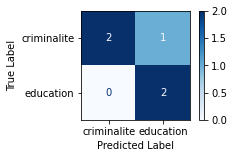

In [77]:
Log = LogisticRegression(solver='liblinear')
Log.fit(X_train, y_train)
y_pred = Log.predict(X_test)
print("score : ", Log.score(X_test, y_test))
print(classification_report(y_test, y_pred))
plot_confusion_matrix1(Log)

score :  0.6
              precision    recall  f1-score   support

 criminalite       0.67      0.67      0.67         3
   education       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



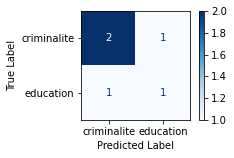

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=40,algorithm="SAMME.R",learning_rate=0.3)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix1(ada_clf)

score :  0.6
              precision    recall  f1-score   support

 criminalite       0.67      0.67      0.67         3
   education       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



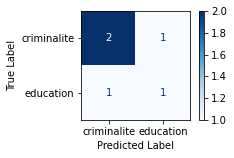

In [64]:
from sklearn.ensemble import RandomForestClassifier
clfRandomForestClassifier = RandomForestClassifier(n_estimators=50)
clfRandomForestClassifier.fit(X_train, y_train)
y_pred = clfRandomForestClassifier.predict(X_test)
print("score : ", clfRandomForestClassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))
plot_confusion_matrix1(clfRandomForestClassifier)

score :  0.8
              precision    recall  f1-score   support

 criminalite       1.00      0.67      0.80         3
   education       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



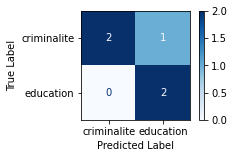

In [66]:
clf20 = RandomForestClassifier(n_estimators=50, max_depth=20)
clf20.fit(X_train, y_train)
y_pred = clf20.predict(X_test)
print("score : ", clf20.score(X_test, y_test))
print(classification_report(y_test, y_pred))
plot_confusion_matrix1(clf20)

# Sauvgarder le model 

In [67]:
import pickle
pickle.dump(clf20, open('categorie.pkl', 'wb'))

# Chargement du model

In [68]:
model = pickle.load(open('categorie.pkl', 'rb'))
import sklearn

# Tester le model sur de nouveau surligneurs 

In [69]:
def test_classification(surligneur):
    vec = get_vecteur(surligneur)
    print(model.predict(vec.reshape(1, -1)))

In [70]:
# surligneur education
test_classification('Les textes existent pour permettre à l’éducation nationale de prendre au mieux en considération le handicap (quel qu’il soit) de ses agents et leur proposer des solutions adaptées.')

['education']


In [71]:
# surligneur criminalite
test_classification('Les violences sexistes et sexuelles sont heureusement condamnées par la loi en France mais seul le viol ou des infractions répétées de la part d’un étranger pourrait engendrer son expulsion, sauf si son pays d’origine ne présente un danger pour sa vie.')

['criminalite']


In [72]:
# surligneur education
test_classification('Le maire de Bordeaux ne pourra pas obliger les habitants de sa ville à porter un masque en l’absence de raison impérieuse propre à sa commune. La loi d’urgence sanitaire habilite le seul Gouvernement et les préfets à prendre des mesures de lutte contre le covid-19, et non les maires. Le Conseil d État l’a déjà jugé à propos d’un arrêté à Sceaux.')

['education']
